In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('LTV.csv')
df.head(3)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [3]:
df = df.drop('Customer', axis = 1)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

Отметим, что пропусков данных нет.  
Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

## **Разделим DataFrame на train и test**

In [5]:
X = df.drop('Customer Lifetime Value', axis = 1)
# Выбирая один столбец из DataFrame, мы получаем массив Series.
# Если хочется получиить массив именно в виде DataFrame, можно запросить его,
# подавая не название столбца, а список содержащий только один этот столбец (такой трюк)
y = df[['Customer Lifetime Value']]


In [7]:
# Импорт функции
from sklearn.model_selection import train_test_split

# random_state = 42 (по умолчанию = 42) - запоминает состояние случайного разбиения (аналог random.seed(42))
# test_size = .2 - в тестовой выборке будет 20% данных
# shuffle=True - перемешивает исходный DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2, shuffle=True)

print("Размерность тренировочной выборки:", X_train.shape)
print("Размерность тестовой выборки:", X_test.shape)


Размерность тренировочной выборки: (7307, 22)
Размерность тестовой выборки: (1827, 22)


Задача не является бинарной, т.е. здесь подходят модели линейной регрессии, нежели логистической.

## **Выделим численные и строковые признаки от остальных**

In [8]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else:
        str_cols.append(col)

# str_cols.remove('Customer')
print(num_cols)
print(str_cols)


['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']
['State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']


In [9]:
# Здесь мы явно указываем цифровые фичи (колонки)
# Можно тоже самое получить без указания цифровых колонок. Рекомендуется указывать явно
# df.describe()
df.describe()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## **Построим графики, посмотрим на распределение признаков**

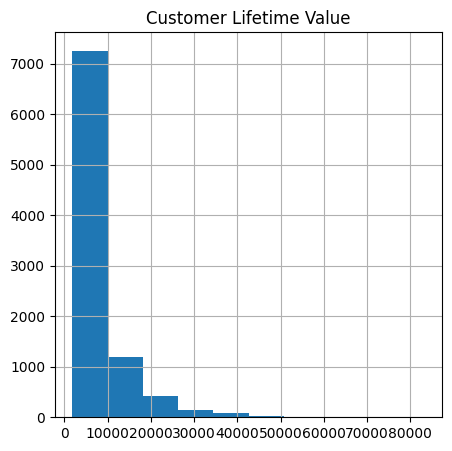

In [10]:
plt.figure(figsize = (5, 5))
plt.title('Customer Lifetime Value')
df['Customer Lifetime Value'].hist()

plt.show()


In [11]:
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7307 entries, 5123 to 7270
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer Lifetime Value  7307 non-null   float64
dtypes: float64(1)
memory usage: 114.2 KB


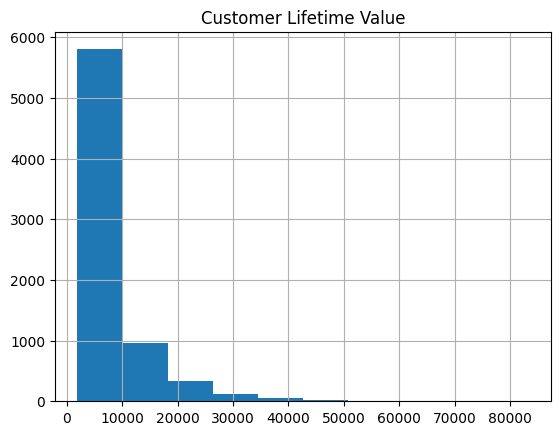

In [12]:
y_train.hist()
plt.show()


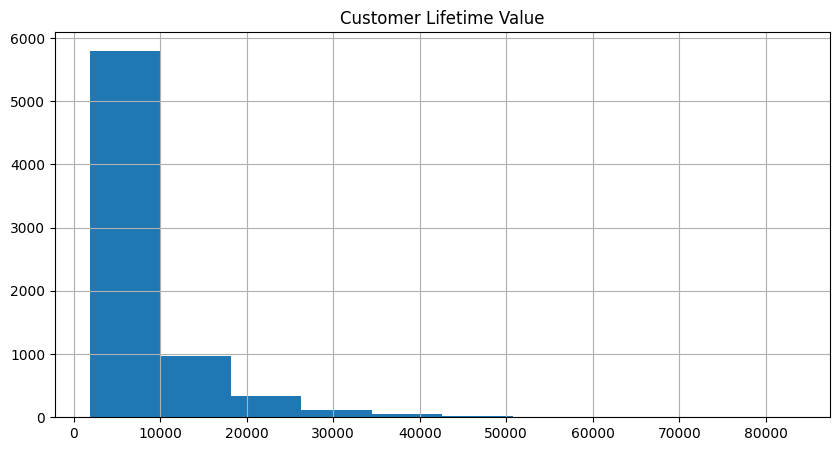

In [13]:
plt.figure(figsize = (10, 5))
plt.title('Customer Lifetime Value')
y_train['Customer Lifetime Value'].hist()

plt.show()


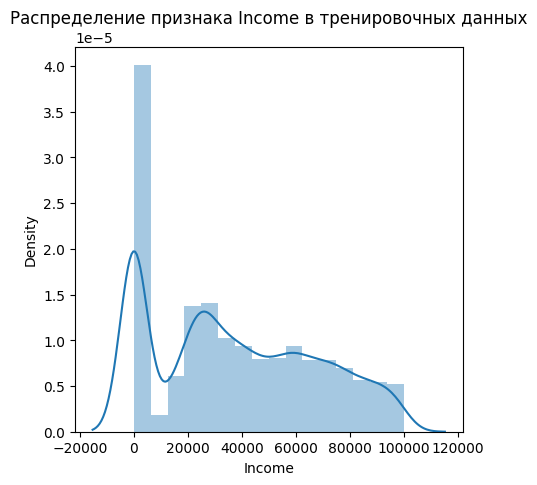

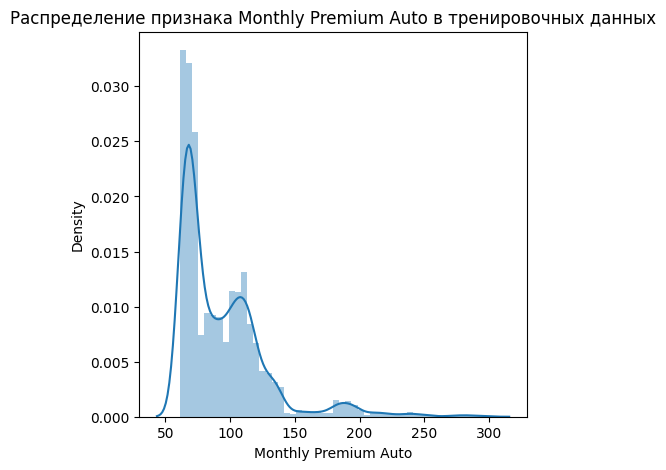

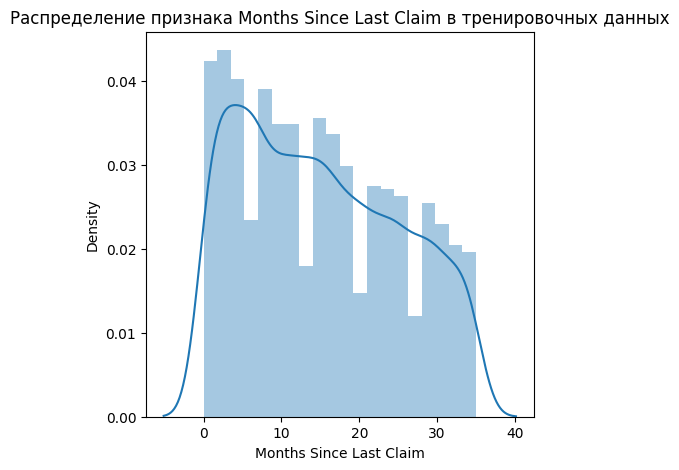

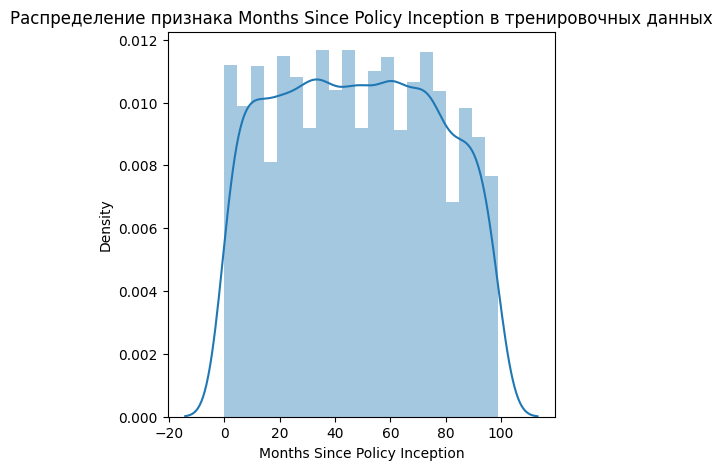

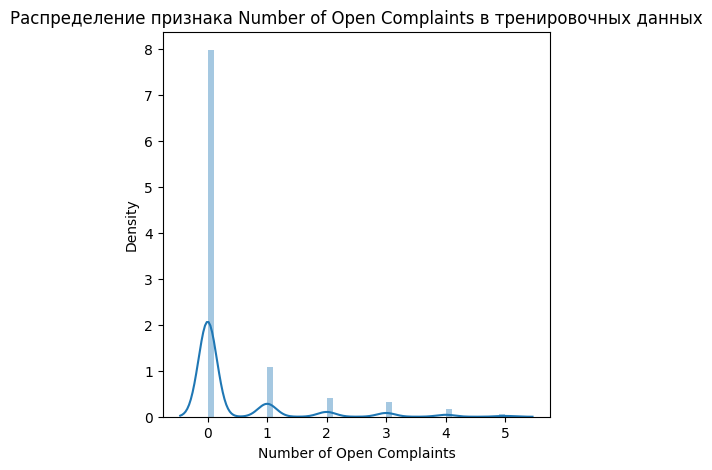

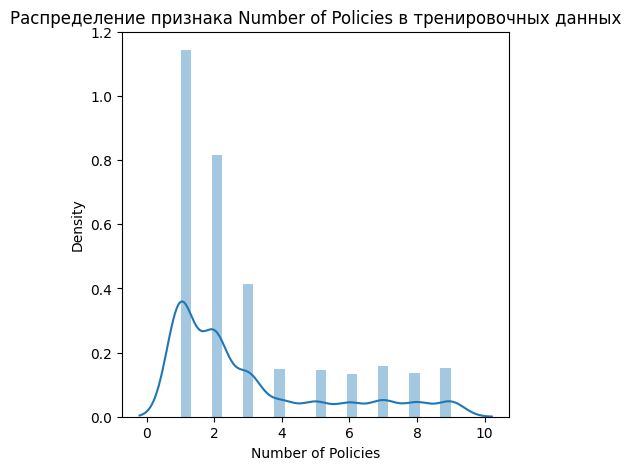

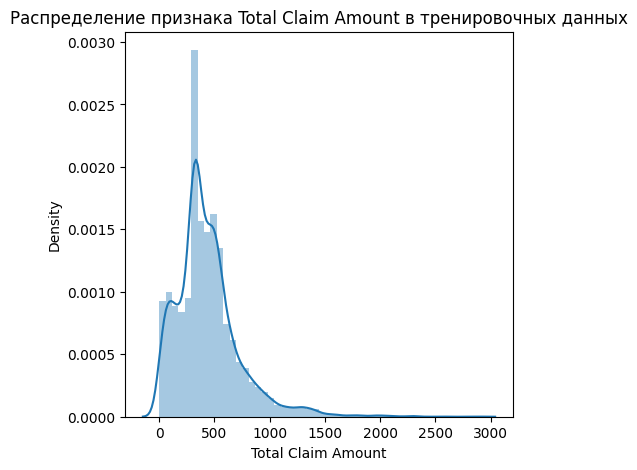

In [14]:
for col in num_cols:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    # Используем метод matplotlib distribution plot с указанием нашей колонки
    sns.distplot(X_train[col])


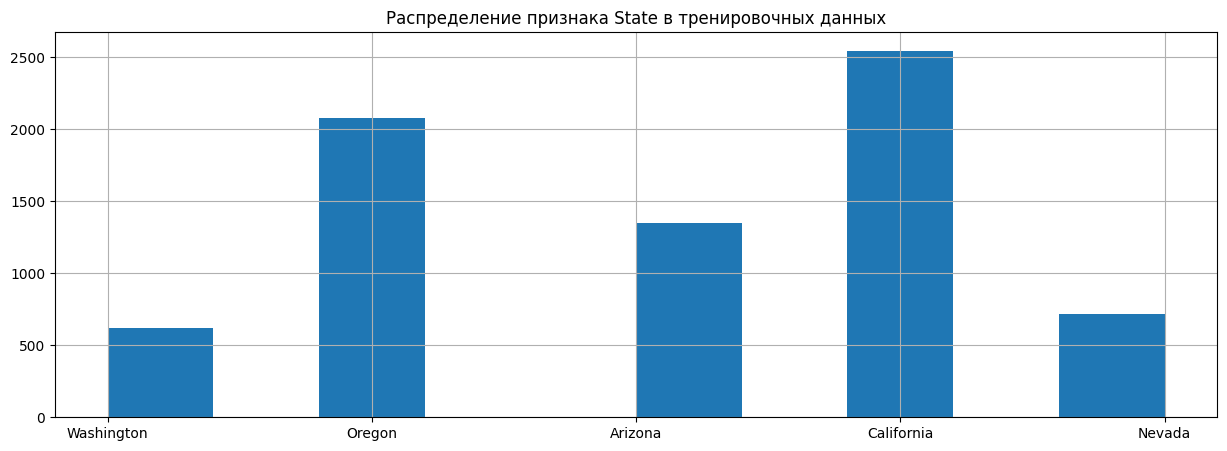

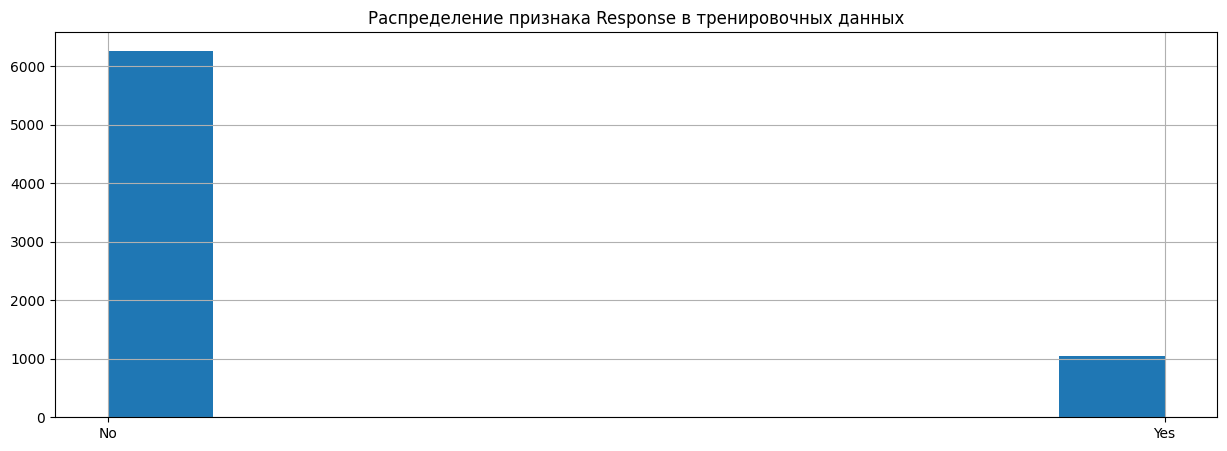

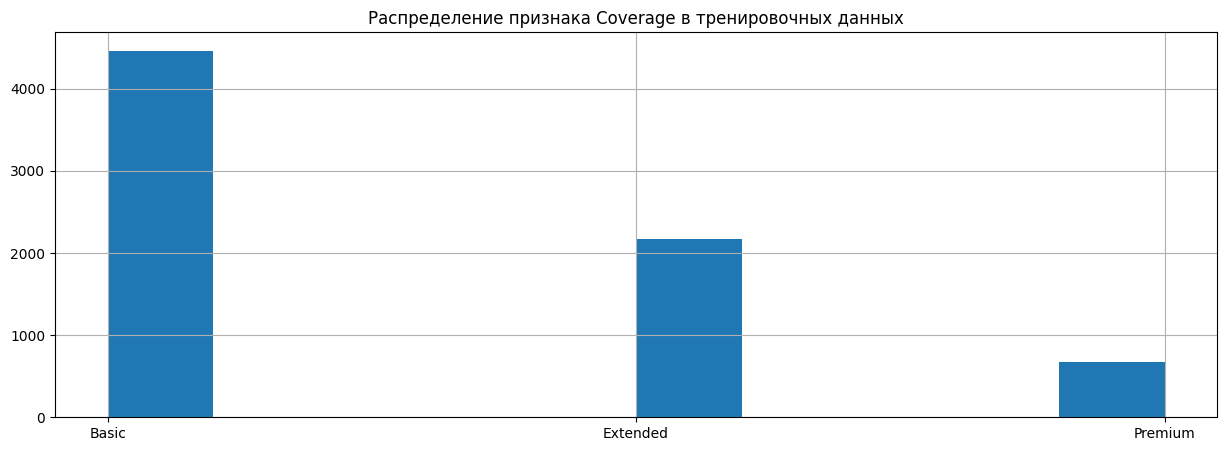

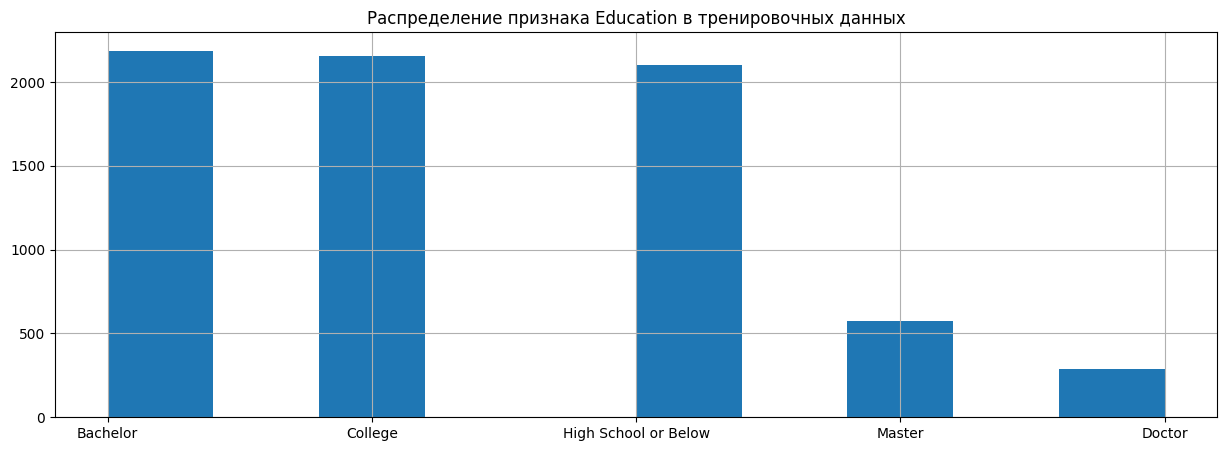

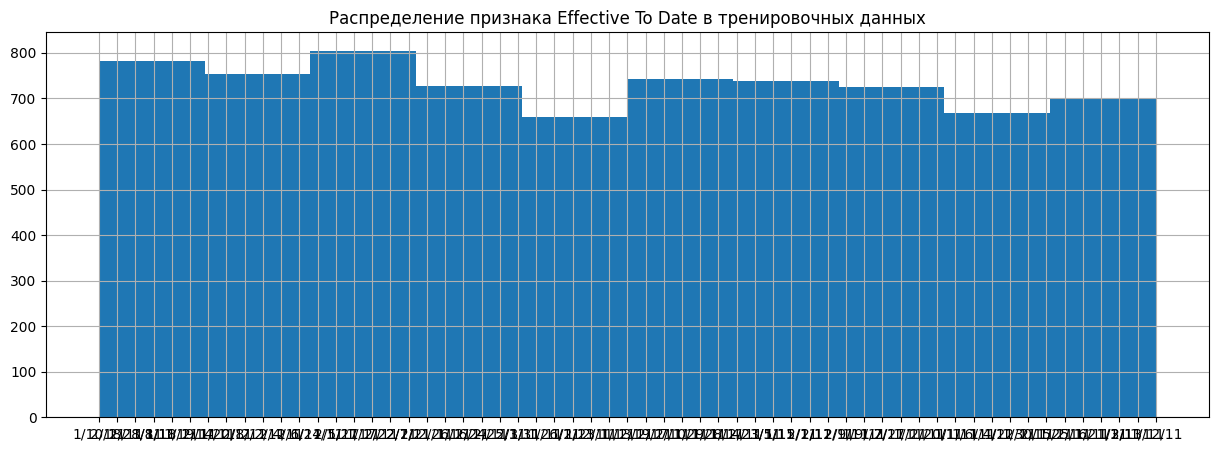

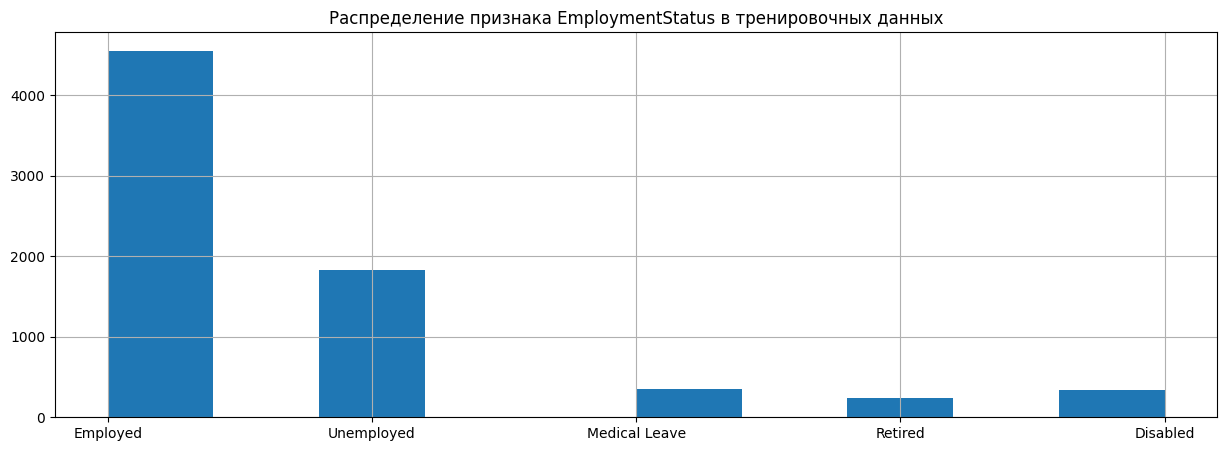

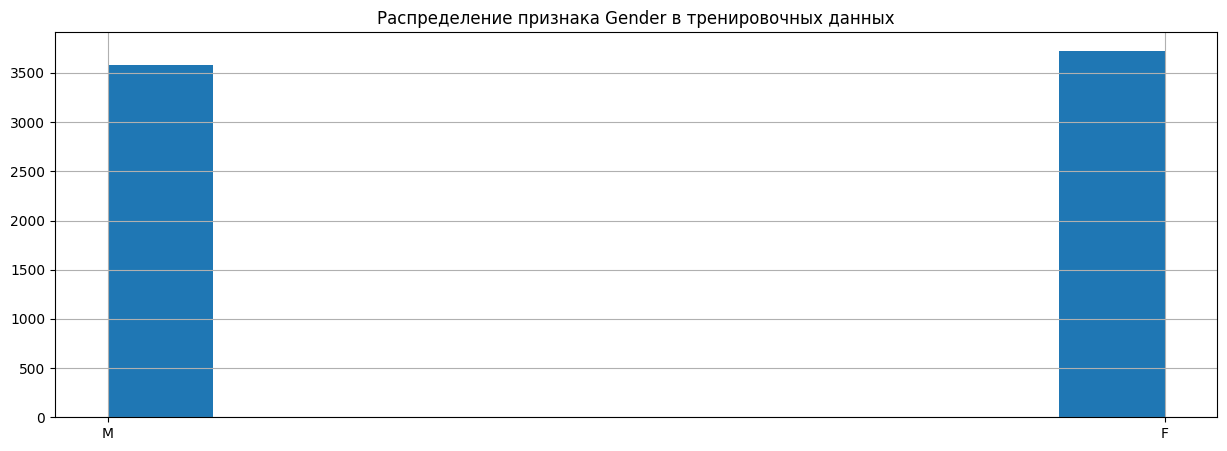

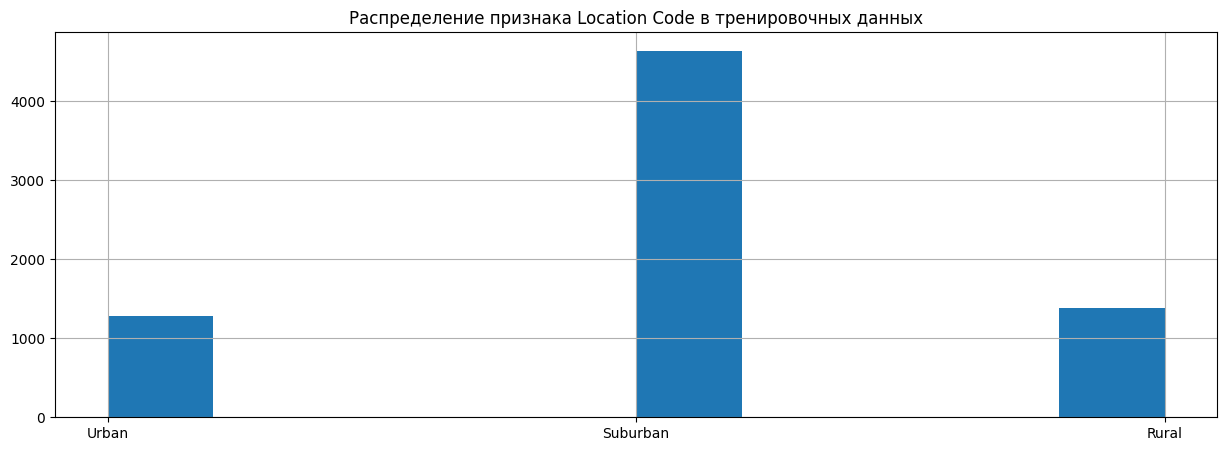

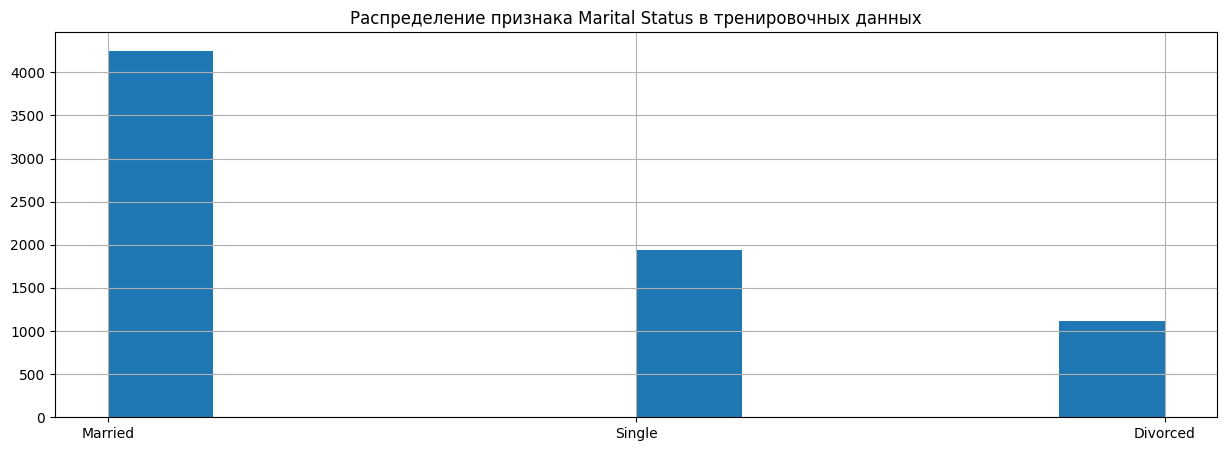

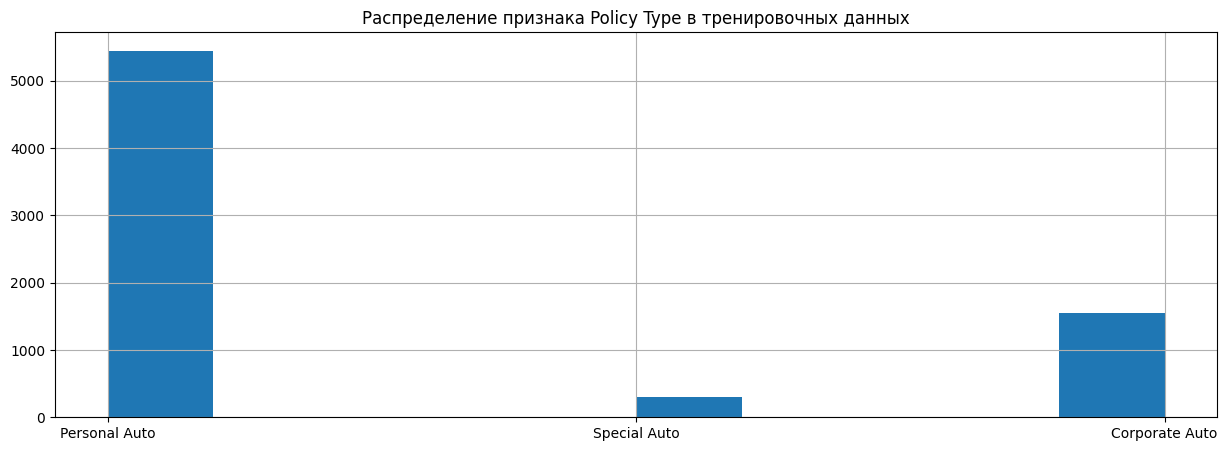

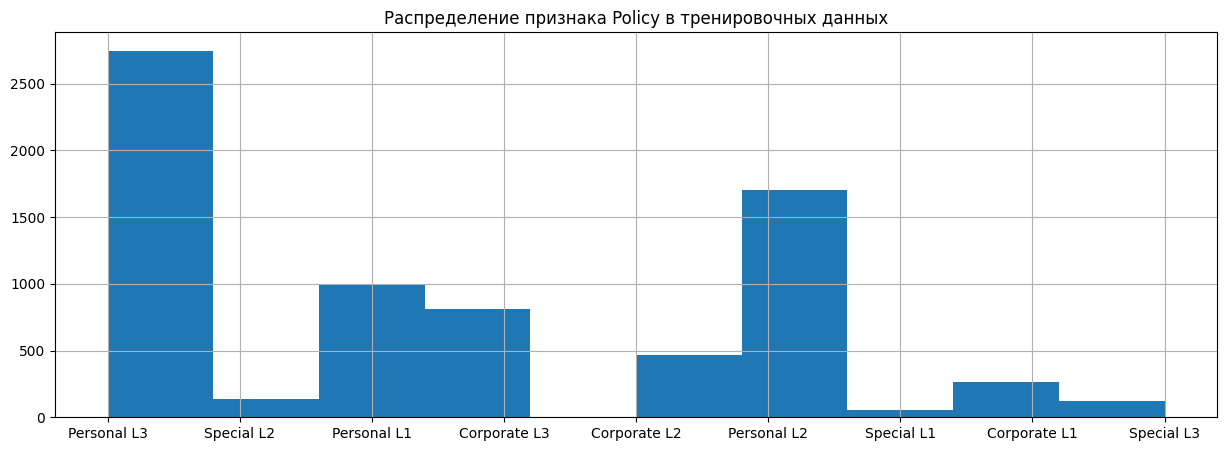

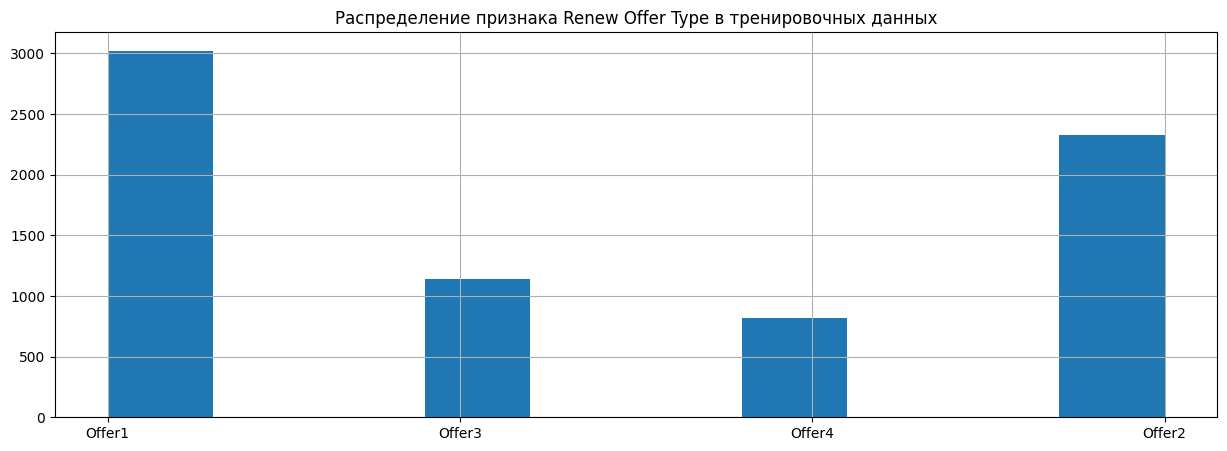

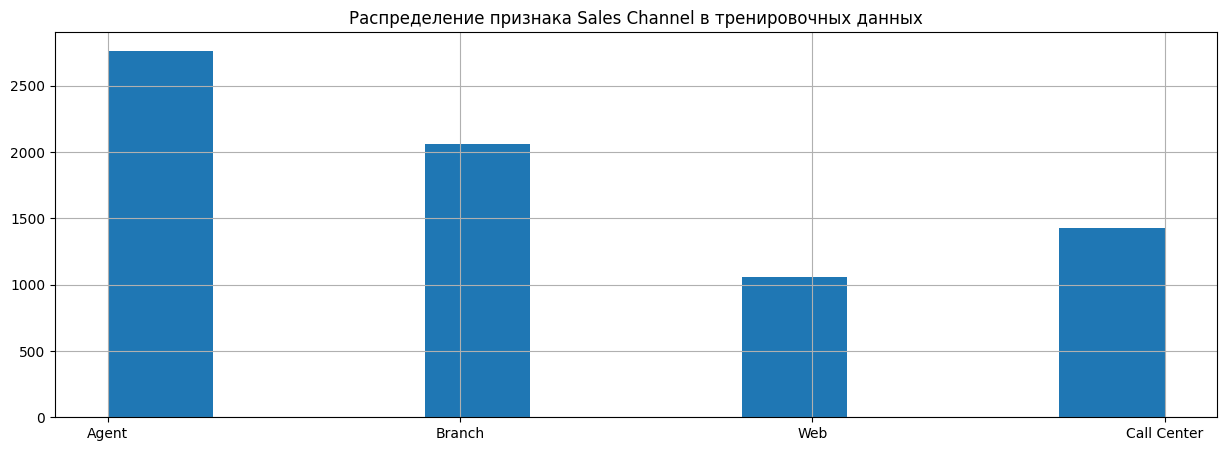

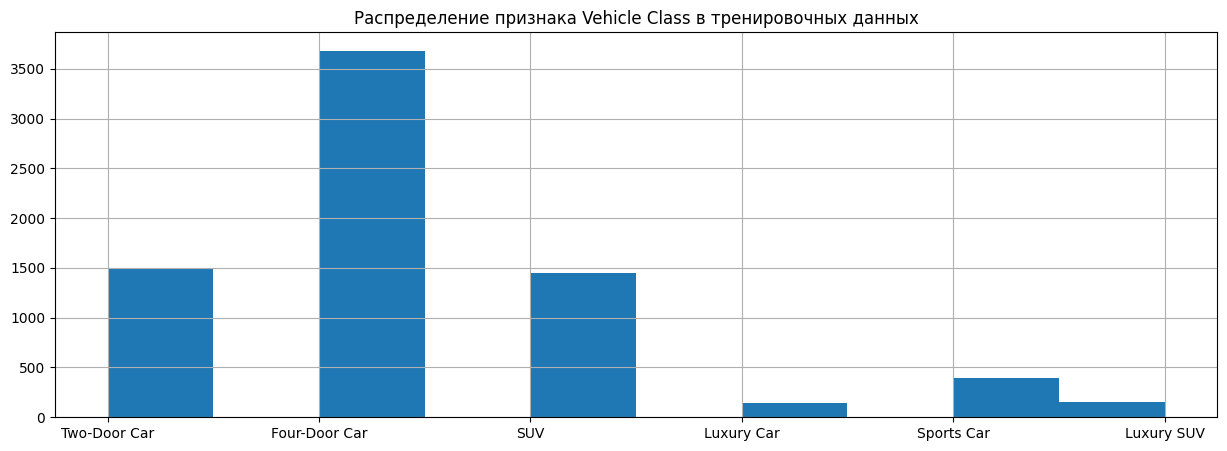

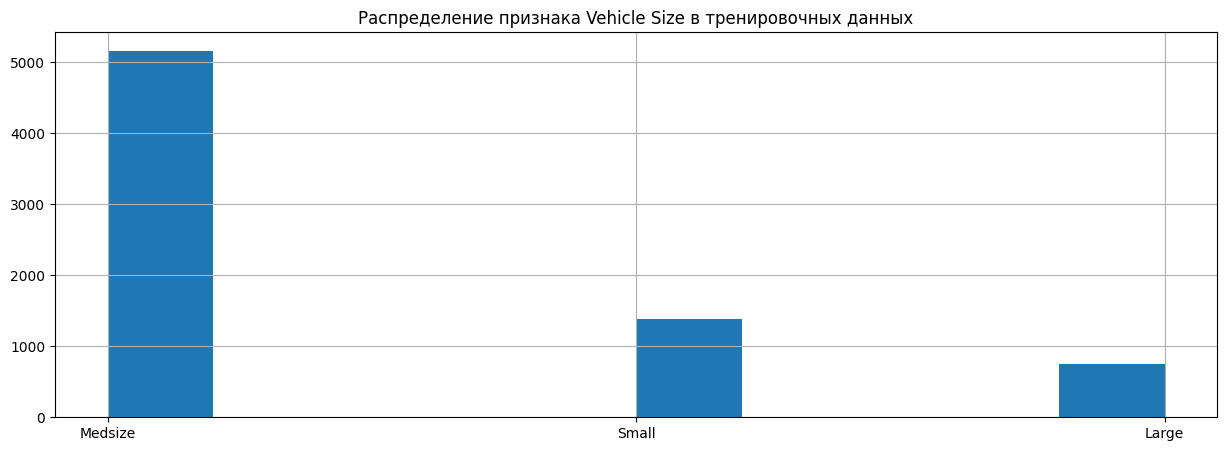

In [15]:
for col in str_cols:
    plt.figure(figsize = (15, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    X_train[col].hist()


In [16]:
y_train.describe()


,Customer Lifetime Value
count,7307.000000
mean,8022.789394
std,6791.672803
min,1898.007675
25%,4061.273191
50%,5821.787383
75%,9007.014951
max,83325.381190


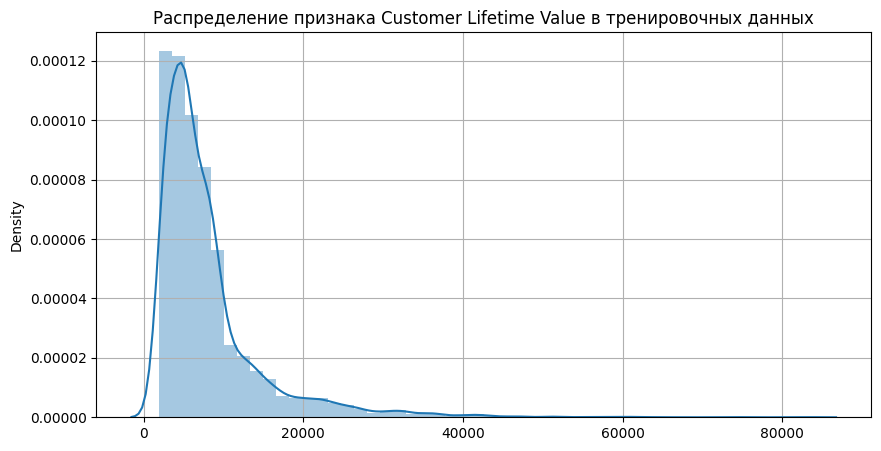

In [17]:
plt.figure(figsize = (10, 5))
plt.title(f'Распределение признака Customer Lifetime Value в тренировочных данных')
sns.distplot(y_train)
plt.grid()
plt.show()


## **Предобработка признаков**

**Важно!!!** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

In [18]:
X_test.head(3)


,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
708,California,No,Basic,High School or Below,1/17/11,Employed,M,74585,Rural,Married,...,49,0,1,Personal Auto,Personal L3,Offer2,Agent,218.598065,SUV,Medsize
47,Oregon,No,Basic,High School or Below,1/2/11,Employed,F,23218,Suburban,Single,...,10,0,4,Personal Auto,Personal L2,Offer4,Agent,447.793440,Two-Door Car,Medsize
3995,Oregon,Yes,Extended,College,1/28/11,Employed,F,94903,Suburban,Married,...,38,0,1,Personal Auto,Personal L3,Offer2,Agent,451.200000,Two-Door Car,Small


In [19]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7307 entries, 5123 to 7270
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          7307 non-null   object 
 1   Response                       7307 non-null   object 
 2   Coverage                       7307 non-null   object 
 3   Education                      7307 non-null   object 
 4   Effective To Date              7307 non-null   object 
 5   EmploymentStatus               7307 non-null   object 
 6   Gender                         7307 non-null   object 
 7   Income                         7307 non-null   int64  
 8   Location Code                  7307 non-null   object 
 9   Marital Status                 7307 non-null   object 
 10  Monthly Premium Auto           7307 non-null   int64  
 11  Months Since Last Claim        7307 non-null   int64  
 12  Months Since Policy Inception  7307 non-null   int

In [20]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1827 entries, 708 to 7971
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          1827 non-null   object 
 1   Response                       1827 non-null   object 
 2   Coverage                       1827 non-null   object 
 3   Education                      1827 non-null   object 
 4   Effective To Date              1827 non-null   object 
 5   EmploymentStatus               1827 non-null   object 
 6   Gender                         1827 non-null   object 
 7   Income                         1827 non-null   int64  
 8   Location Code                  1827 non-null   object 
 9   Marital Status                 1827 non-null   object 
 10  Monthly Premium Auto           1827 non-null   int64  
 11  Months Since Last Claim        1827 non-null   int64  
 12  Months Since Policy Inception  1827 non-null   int6

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])
    # Обратить внимание, что тут мы используем transform(), а не fit_transform()
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

X_train.head()


,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5123,4,0,0,0,1,1,1,51144,2,1,...,32,1,9,1,5,0,0,223.305224,5,1
7738,3,0,1,1,40,4,0,0,1,2,...,25,0,1,2,7,2,1,568.800000,0,1
214,0,0,0,1,51,1,1,81097,1,0,...,67,0,1,1,3,3,0,355.200000,0,2
8580,1,0,0,0,29,1,0,72264,2,1,...,66,0,9,0,2,2,3,272.649844,0,1
7857,4,0,0,0,9,1,0,54737,1,2,...,86,0,1,1,5,2,3,391.970334,0,1


In [22]:
X_test.head()


,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
708,1,0,0,3,8,1,1,74585,0,1,...,49,0,1,1,5,1,0,218.598065,3,1
47,3,0,0,3,11,1,0,23218,1,2,...,10,0,4,1,4,3,0,447.793440,5,1
3995,3,1,1,1,20,1,0,94903,1,1,...,38,0,1,1,5,1,0,451.200000,5,2
1513,1,0,1,1,58,1,0,77153,2,1,...,27,1,5,1,5,0,1,355.641958,0,1
3686,4,0,0,3,43,0,0,23769,1,0,...,14,0,2,1,4,0,1,470.097411,0,1


In [23]:
# Проводим масштабирование данных
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
y_train_sc = sc.fit_transform(y_train)
X_test_sc = sc.fit_transform(X_train)
y_test_sc = sc.fit_transform(y_train)


In [24]:
X_train_sc


array([[ 1.76567925, -0.40782451, -0.7306674 , ..., -0.73113995,
         1.50575311, -0.16257659],
       [ 0.9850283 , -0.40782451,  0.78997819, ...,  0.45007056,
        -0.91440834, -0.16257659],
       [-1.35692456, -0.40782451, -0.7306674 , ..., -0.2802055 ,
        -0.91440834,  1.70820626],
       ...,
       [-0.57627361, -0.40782451,  0.78997819, ...,  2.1279703 ,
         0.53768853, -0.16257659],
       [-1.35692456,  2.45203507,  0.78997819, ...,  0.78648987,
         0.53768853, -0.16257659],
       [-1.35692456, -0.40782451,  0.78997819, ..., -0.31844453,
        -0.91440834, -0.16257659]])

In [25]:
y_train_sc


array([[-0.4791244 ],
       [-0.76499347],
       [-0.75242833],
       ...,
       [ 0.14283022],
       [ 0.97370926],
       [-0.68811765]])

## Корреляция признаков

Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин **(с) Википедия**


**Корреляция** - величина показывающая связь двух и более величин. Существуют различные виды корреляций, мы не будем останавливаться на этом, для желающих разобраться ссылки на материалы в конце урока

**Корреляционная матрица** - квадратная матрица, элементы которой представляют собой корреляцию величин
В библиотеке `pandas.DataFrame` есть атрибут `corr()`, который считает корреляционную матрицу

In [26]:
# Чем ближе к 1, тем сильнее корреляция или чем ближе к -1, тем сильнее отрицательная корреляция
corr_m = X_train.corr()
corr_m


,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,-0.002200,0.001818,0.017511,0.006117,-0.000848,-0.016615,0.010036,-0.004906,0.016909,...,0.005730,0.004458,-0.016132,0.001148,0.002686,-0.005001,-0.005170,0.000732,0.018665,-0.002749
Response,-0.002200,1.000000,0.001381,-0.012311,-0.039945,-0.011242,0.000377,0.008547,0.002018,-0.097170,...,0.009991,-0.015463,-0.031910,0.004098,0.003419,-0.167926,-0.092250,0.014941,0.021882,-0.050927
Coverage,0.001818,0.001381,1.000000,0.018519,0.000110,0.006981,-0.005072,-0.011704,-0.023440,0.019986,...,0.005933,-0.013779,-0.015142,-0.003815,-0.007717,-0.051687,-0.031673,0.273785,-0.015089,0.001512
Education,0.017511,-0.012311,0.018519,1.000000,0.008423,-0.022006,0.001480,0.011343,-0.007522,0.013356,...,0.005998,-0.028579,0.005525,0.004558,0.001501,0.063566,-0.002336,0.027650,0.016838,-0.007511
Effective To Date,0.006117,-0.039945,0.000110,0.008423,1.000000,-0.001549,-0.001814,-0.004864,-0.006517,-0.010025,...,0.003939,-0.013609,0.010481,-0.011563,-0.011395,0.005488,-0.014713,-0.005877,-0.020624,0.008312
EmploymentStatus,-0.000848,-0.011242,0.006981,-0.022006,-0.001549,1.000000,0.032911,-0.722215,0.013429,0.308442,...,0.008749,0.014485,0.000312,-0.009981,-0.004239,-0.121698,-0.013273,0.331586,-0.007450,-0.003159
Gender,-0.016615,0.000377,-0.005072,0.001480,-0.001814,0.032911,1.000000,-0.014996,0.002235,0.042279,...,0.007686,0.000130,0.016778,-0.006335,-0.007079,0.037207,-0.022247,0.075970,0.014689,0.001479
Income,0.010036,0.008547,-0.011704,0.011343,-0.004864,-0.722215,-0.014996,1.000000,-0.026083,-0.227793,...,0.010129,0.004941,-0.004811,0.004144,0.007478,0.138218,0.010043,-0.356830,0.007076,0.004167
Location Code,-0.004906,0.002018,-0.023440,-0.007522,-0.006517,0.013429,0.002235,-0.026083,1.000000,0.020278,...,0.006820,-0.002911,0.010919,0.013358,0.007690,-0.026873,-0.003573,0.244202,0.008577,0.017460
Marital Status,0.016909,-0.097170,0.019986,0.013356,-0.010025,0.308442,0.042279,-0.227793,0.020278,1.000000,...,-0.025181,0.004557,0.018063,0.017038,0.009957,-0.026822,-0.019757,0.213831,0.013295,0.019319


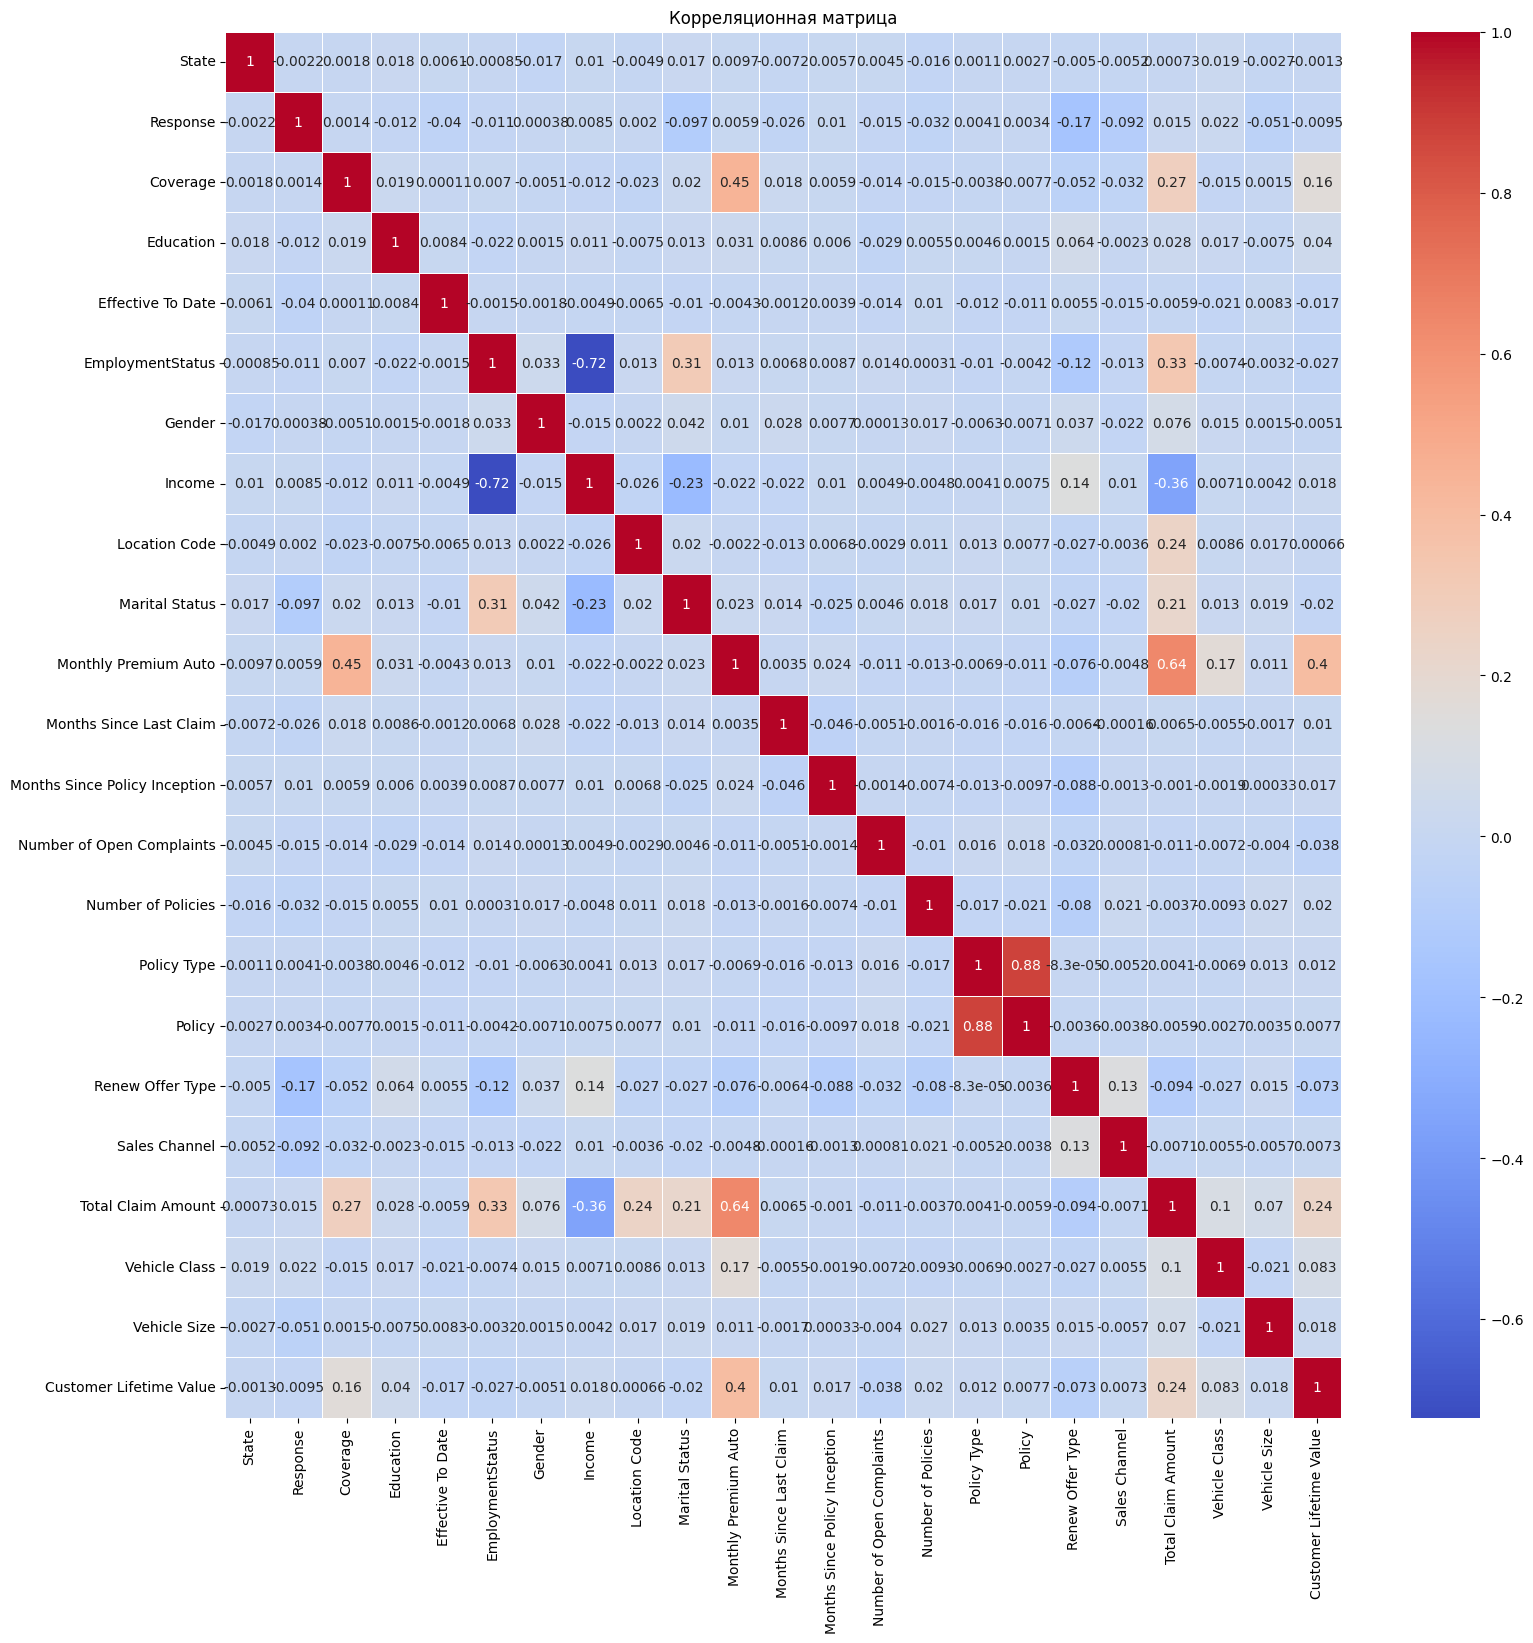

In [27]:
# Преобразуем матрицу признаков в DataFrame
X_train_trasformed = pd.DataFrame(X_train_sc, columns = X_train.columns)
# Добавили колонку Customer Lifetime Value
X_train_trasformed['Customer Lifetime Value'] = y_train_sc
# Создаем корреляционную матрицу
corr_m = X_train_trasformed.corr()

# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True, linewidths=0.5, cmap='coolwarm')
# sns.heatmap(corr_m, annot = True)
plt.show()


## **Выводы по корреляции**
* Что касается нашего Customer Lifetime Value, то наюлюдается положитнльная кореляция с пользователями владеющими длительное время премиальным авто.  
* Так же прослеживается положительная зависимость (корреляция) Customer Lifetime Value от Total Claim Amount (суммы выплаченной компенсации) - клиенты начинают верить в страховку.

## **Обучение моделей**

Т.к. на выходе у нас не бинарная величина, то модель Логистической регрессии, классификатор на решающем дереве, и случайный лес здесь не применимы.  
Применин модель Линейной регрессии.

In [28]:
from sklearn.linear_model import LinearRegression
# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель
model.fit(X_train_sc, y_train_sc)
preds = model.predict(X_test_sc)


In [29]:
# Оценка качества модели
# Импортируем MSE
from sklearn.metrics import mean_squared_error

# На вход функция принимает вектор предсказанных и настоящих значений целевой переменной
mse = mean_squared_error(preds, y_test_sc)

print(mse)


0.8326403893028226


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

trees = DecisionTreeRegressor(random_state = 42)
model.fit(X_train_sc, y_train_sc)

pred = model.predict(X_test_sc)
print(mean_absolute_error(pred, y_test_sc))


0.5683422736607441


## **Вывод**  
Линейная регрессия показывает лучние предсказания